# 1st order modeling

Google cola環境で簡単に実行したい場合は，以下をクリックあるいはドラッグしてブラウザのタブへ移動する

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RIPES-ACROSS/Control-System-Design-and-Application/blob/master/Modeling/modeling_1st_order.ipynb)

## 代数計算モジュールのインストール

In [1]:
!pip install sympy

## モジュールの読込み

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sympy as sy
sy.init_printing()

## 変数の定義

In [3]:
s = sy.Symbol('s')
t = sy.Symbol('t', real=True)
C, R, v_i, v_o = sy.symbols('C R v_i v_o', positive=True)

## 式の定義

In [4]:
tf_dict = {
    'step': 1/s,
    'plant':1/(C*R*s+1)
}

## 逆ラプラス変換

In [5]:
res_dict = {}
t_dict = {}
for key, value in tf_dict.items():
    print('Processing ... {}'.format(key))
    var_list = [t]
    if key in ['step']:
        res_dict[key] = sy.inverse_laplace_transform(tf_dict[key], s, t, )
        t_dict[key] = sy.Lambda(var_list, res_dict[key])
        continue
    elif key in ['plant']:
        var_list.append(C)
        var_list.append(R)
    else:
        sys.exit('ERROR: something worng {}'.format(key))
    res_dict[key] = sy.inverse_laplace_transform(tf_dict[key]*tf_dict['step'], s, t, plane=0)
    t_dict[key] = sy.Lambda(var_list, res_dict[key])

Processing ... step


/opt/conda/lib/python3.8/site-packages/sympy/core/function.py:1987: SymPyDeprecationWarning: 

non tuple iterable of argument symbols to Lambda has been deprecated
since SymPy 1.5. Use tuple of argument symbols instead. See
https://github.com/sympy/sympy/issues/17474 for more info.

  SymPyDeprecationWarning(


Processing ... plant


## S領域・t領域それぞれにおける関数形

step


plant


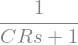

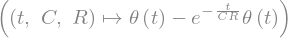

In [6]:
for key, value in tf_dict.items():
    print(key)
    display(value)
    display(t_dict[key])

## システム状態の時間発展

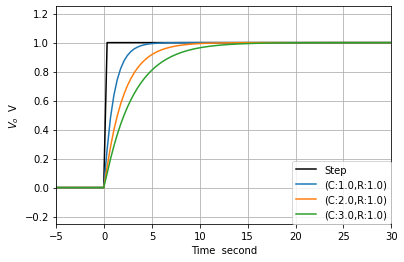

In [7]:
param_tuple_list = [ # (C, R)
    (1.0, 1.0), 
    (2.0, 1.0), 
    (3.0, 1.0), 
]

T_MIN = -5
T_MAX = 30
trange = np.linspace(T_MIN, T_MAX, 100)
plt.plot(trange, 
         [t_dict['step'](tt).evalf(chop=True)
          for tt in trange], 
         label = 'Step', color='black')
for i, param_tuple in enumerate(param_tuple_list):
    plt.plot(trange, 
             [t_dict['plant'](tt, *param_tuple).evalf(chop=True)
              for tt in trange], 
             label = '(C:{},R:{})'.format(*param_tuple))

plt.xlabel('Time  second')
plt.ylabel(r'$V_o$  V')
plt.ylim(-0.25, 1.25)
plt.xlim(T_MIN, T_MAX)
plt.legend(loc='best', 
           borderaxespad=0, fontsize=10)
plt.grid()
plt.savefig('./modeling_1st_order.png', dpi=300, bbox_inches='tight')
plt.show()